In [1]:
%pip install transformers
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import datetime as dt
import numpy as np

# Visualization libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Transformer model
from transformers import pipeline


/Users/fairuj/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/fairuj/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load data
posts_df = pd.read_csv('DS_ML_AI_posts.csv')
comments_df = pd.read_csv('DS_ML_AI_comments.csv', engine='python')

# Number of observations - for metric cells
number_of_posts = posts_df.shape[0]
number_of_comments = comments_df.shape[0]
count_subreddits = posts_df['subreddit'].nunique()

print("You are pulling data from...")
print("Number of posts:", number_of_posts)
print("Number of comments: ", number_of_comments)
print("Number of subreddits: ", count_subreddits)

You are pulling data from...
Number of posts: 2987
Number of comments:  272795
Number of subreddits:  3


In [4]:
# Convert created date to normal datetime
posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
posts_df['created_year'] = posts_df['created_date'].dt.year
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,1d6iggo,artificial,1.717349e+09,NaN,https://i.redd.it/dn171w8c174d1.jpeg,What are your thoughts on the following statem...,Discussion,13070,1428,0.93,2024-06-02 13:29:13,2024
1,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8255,195,0.99,2020-05-10 09:19:54,2020
2,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,6185,134,0.98,2021-01-10 05:30:36,2021
3,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4851,109,0.97,2020-04-25 00:27:23,2020
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4795,236,0.96,2021-07-11 00:18:59,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2982,8axkgo,artificial,1.523272e+09,NaN,https://www.youtube.com/watch?v=bVT7QlYC7JQ,partially observable Markov decision process: ...,NaN,110,2,0.99,2018-04-09 07:02:36,2018
2983,7gc0iy,artificial,1.511947e+09,NaN,https://news.stanford.edu/2017/11/28/neighborh...,An artificial intelligence algorithm developed...,news,114,15,0.90,2017-11-29 04:24:59,2017
2984,1cblax,artificial,1.365941e+09,NaN,http://www.youtube.com/watch?v=xOCurBYI_gY,Guy creates computer AI that teaches itself to...,NaN,112,25,0.93,2013-04-14 07:56:45,2013
2985,1c5iebs,artificial,1.713280e+09,NaN,https://v.redd.it/exu3lwoowuuc1,Graph-Based Workflow Builder for Web Agents,Project,114,3,0.92,2024-04-16 11:06:18,2024


In [5]:
# Merge posts with their comments
comments_posts_df = posts_df.merge(comments_df, on='post_id', how='left')

# Remove rows with missing comments
comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

EDA

In [6]:
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,1d6iggo,artificial,1.717349e+09,NaN,https://i.redd.it/dn171w8c174d1.jpeg,What are your thoughts on the following statem...,Discussion,13070,1428,0.93,2024-06-02 13:29:13,2024
1,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8255,195,0.99,2020-05-10 09:19:54,2020
2,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,6185,134,0.98,2021-01-10 05:30:36,2021
3,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4851,109,0.97,2020-04-25 00:27:23,2020
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4795,236,0.96,2021-07-11 00:18:59,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2982,8axkgo,artificial,1.523272e+09,NaN,https://www.youtube.com/watch?v=bVT7QlYC7JQ,partially observable Markov decision process: ...,NaN,110,2,0.99,2018-04-09 07:02:36,2018
2983,7gc0iy,artificial,1.511947e+09,NaN,https://news.stanford.edu/2017/11/28/neighborh...,An artificial intelligence algorithm developed...,news,114,15,0.90,2017-11-29 04:24:59,2017
2984,1cblax,artificial,1.365941e+09,NaN,http://www.youtube.com/watch?v=xOCurBYI_gY,Guy creates computer AI that teaches itself to...,NaN,112,25,0.93,2013-04-14 07:56:45,2013
2985,1c5iebs,artificial,1.713280e+09,NaN,https://v.redd.it/exu3lwoowuuc1,Graph-Based Workflow Builder for Web Agents,Project,114,3,0.92,2024-04-16 11:06:18,2024


<Figure size 1400x800 with 0 Axes>

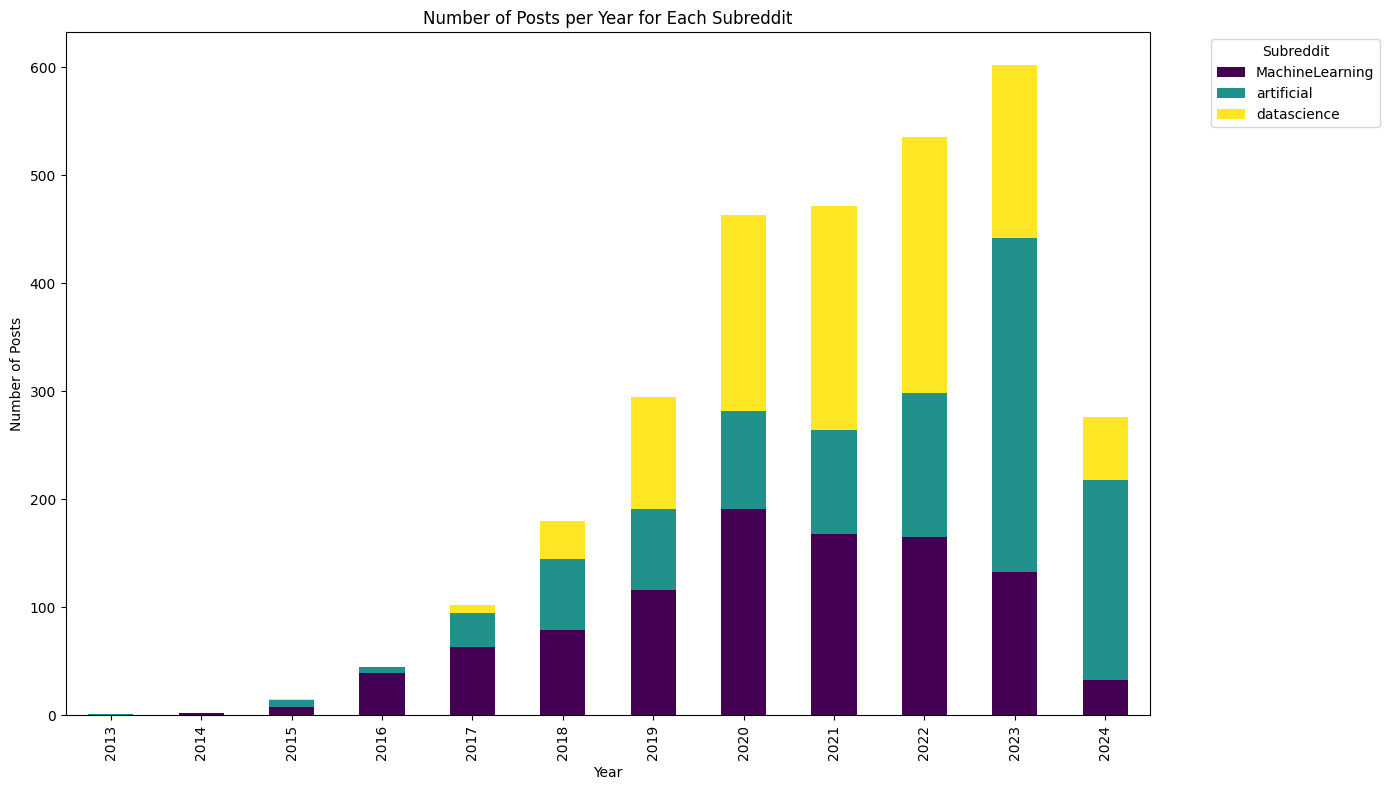

In [7]:

# Example DataFrame (assuming you already have posts_df)
# posts_df = pd.read_csv('DS_ML_AI_posts.csv')

# Step 1: Convert the timestamp to datetime format
posts_df['created_date'] = pd.to_datetime(posts_df['created_utc'], unit='s')

# Step 2: Extract the year from the datetime
posts_df['year'] = posts_df['created_date'].dt.year

# Step 3: Group by year and subreddit and count the number of posts
posts_per_year_subreddit = posts_df.groupby(['year', 'subreddit']).size().unstack(fill_value=0)

# Step 4: Create a bar plot to visualize the data
plt.figure(figsize=(14, 8))
posts_per_year_subreddit.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))

plt.title('Number of Posts per Year for Each Subreddit')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Wordcloud Post Titles

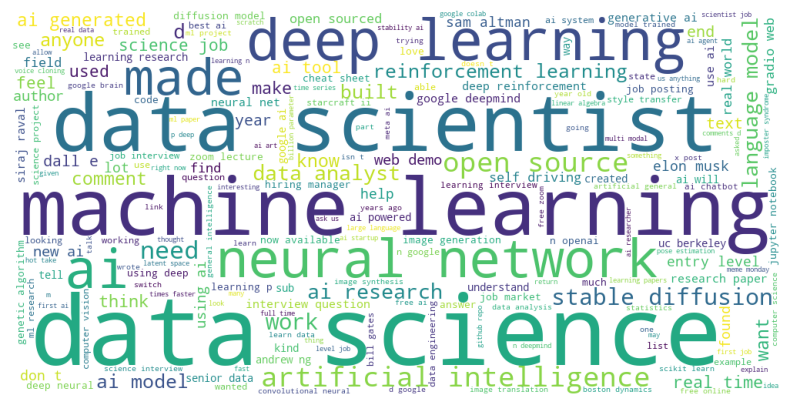

In [8]:
post_title_text = ' '.join([title for title in posts_df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold = 2, width=1000, height=500,
                        background_color = 'white'
                       ).generate(post_title_text)

# Display the generated Word Cloud
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

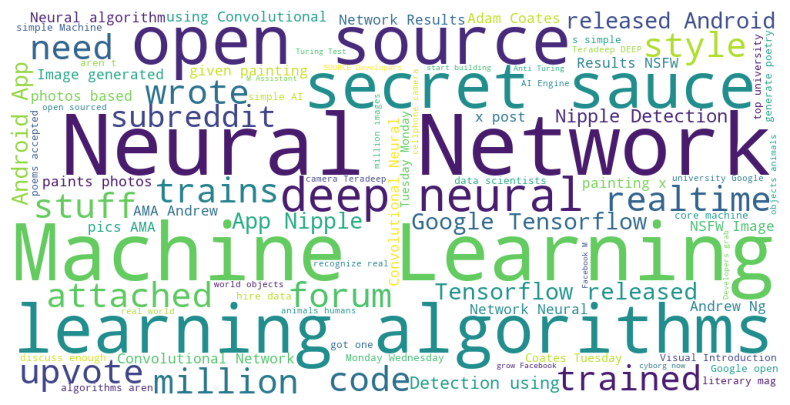

In [9]:
selected_year = int(input("Input a year, between 2013-2024 to see popular topics for that year:"))

posts_in_year = posts_df[posts_df['created_year'] == selected_year]
post_title_text_year = ' '.join(item for item in posts_in_year[~posts_in_year['post_title'].isna()]['post_title'])

word_cloud = WordCloud(collocation_threshold = 2, width=1000, height=500,
                        background_color = 'white',
                    ).generate(post_title_text_year)

# Display the generated Word Cloud
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Sentiment Analysis

In [10]:
word_input = input("Enter a word to conduct sentiment analysis:")

In [11]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Example usage
result = sentiment_classifier("I love using transformers!")
print(result)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POS', 'score': 0.992602527141571}]


In [12]:
def get_sentiment(text):
    # Get sentiment prediction scores
    try:
        sentiment = sentiment_classifier(text)[0]['label']
    except:   
        sentiment = 'Not classified'

    return sentiment

In [13]:
comments_posts_df_sub = comments_posts_df[comments_posts_df['post_title'].str.contains(word_input)]
comments_posts_df_sub

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
229563,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,293,110,0.88,2023-09-21 17:20:59,2023,"""I use tools to help me do better work"" doesn'..."
229564,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,293,110,0.88,2023-09-21 17:20:59,2023,Ask chatgpt
229565,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,293,110,0.88,2023-09-21 17:20:59,2023,"You shouldn’t feel embarrassed, but you *shoul..."
229566,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,293,110,0.88,2023-09-21 17:20:59,2023,As long as you remember that chatGPT can talk ...
229567,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,293,110,0.88,2023-09-21 17:20:59,2023,I use it so much it’s like an unpaid intern. F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270111,12qv5y0,artificial,1.681836e+09,Like this\n\n [Genie - #1 AI Chatbot - ChatGPT...,https://www.reddit.com/r/artificial/comments/1...,Is it my imagination or are 90% of the new API...,Question,118,46,0.95,2023-04-18 12:36:12,2023,You just pull MJ’s voice and fine tune the mod...
270112,12qv5y0,artificial,1.681836e+09,Like this\n\n [Genie - #1 AI Chatbot - ChatGPT...,https://www.reddit.com/r/artificial/comments/1...,Is it my imagination or are 90% of the new API...,Question,118,46,0.95,2023-04-18 12:36:12,2023,the timing.. the syllable generation.. its har...
270113,12qv5y0,artificial,1.681836e+09,Like this\n\n [Genie - #1 AI Chatbot - ChatGPT...,https://www.reddit.com/r/artificial/comments/1...,Is it my imagination or are 90% of the new API...,Question,118,46,0.95,2023-04-18 12:36:12,2023,"This is going to be big for a short moment, an..."
270114,12qv5y0,artificial,1.681836e+09,Like this\n\n [Genie - #1 AI Chatbot - ChatGPT...,https://www.reddit.com/r/artificial/comments/1...,Is it my imagination or are 90% of the new API...,Question,118,46,0.95,2023-04-18 12:36:12,2023,thats why i just make music for the fun of it ...


In [14]:
comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))
comments_posts_df_sub

Token indices sequence length is longer than the specified maximum sequence length for this model (427 > 128). Running this sequence through the model will result in indexing errors
/var/folders/5z/3s89dfvd7_q9wfy87htrjr3r0000gn/T/ipykernel_11807/3295694029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))


,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment
229563,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,293,110,0.88,2023-09-21 17:20:59,2023,"""I use tools to help me do better work"" doesn'...",NEU
229564,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,293,110,0.88,2023-09-21 17:20:59,2023,Ask chatgpt,NEU
229565,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,293,110,0.88,2023-09-21 17:20:59,2023,"You shouldn’t feel embarrassed, but you *shoul...",Not classified
229566,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,293,110,0.88,2023-09-21 17:20:59,2023,As long as you remember that chatGPT can talk ...,POS
229567,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,293,110,0.88,2023-09-21 17:20:59,2023,I use it so much it’s like an unpaid intern. F...,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270111,12qv5y0,artificial,1.681836e+09,Like this\n\n [Genie - #1 AI Chatbot - ChatGPT...,https://www.reddit.com/r/artificial/comments/1...,Is it my imagination or are 90% of the new API...,Question,118,46,0.95,2023-04-18 12:36:12,2023,You just pull MJ’s voice and fine tune the mod...,NEU
270112,12qv5y0,artificial,1.681836e+09,Like this\n\n [Genie - #1 AI Chatbot - ChatGPT...,https://www.reddit.com/r/artificial/comments/1...,Is it my imagination or are 90% of the new API...,Question,118,46,0.95,2023-04-18 12:36:12,2023,the timing.. the syllable generation.. its har...,NEU
270113,12qv5y0,artificial,1.681836e+09,Like this\n\n [Genie - #1 AI Chatbot - ChatGPT...,https://www.reddit.com/r/artificial/comments/1...,Is it my imagination or are 90% of the new API...,Question,118,46,0.95,2023-04-18 12:36:12,2023,"This is going to be big for a short moment, an...",NEG
270114,12qv5y0,artificial,1.681836e+09,Like this\n\n [Genie - #1 AI Chatbot - ChatGPT...,https://www.reddit.com/r/artificial/comments/1...,Is it my imagination or are 90% of the new API...,Question,118,46,0.95,2023-04-18 12:36:12,2023,thats why i just make music for the fun of it ...,NEU


In [15]:
# Lets-plot library https://lets-plot.org/index.html
from lets_plot import *
from lets_plot.mapping import *

LetsPlot.setup_html()
ggplot(comments_posts_df_sub) + geom_pie(aes(fill=as_discrete('sentiment', order_by='..count..')), 
                                            size=30, hole=0.2, stroke=1.0, 
                                            labels=layer_labels()
                                                    .line('@sentiment')
                                                    .line('(@{..prop..})')
                                                    .format('..prop..', '.0%')
                                        ) \
                              + theme(line=element_blank(), axis_text=element_blank(), 
                                      axis_title=element_blank(), legend_position='none') \
                              + ggtitle('Sentiment of around the topic')

In [16]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Example usage
result = sentiment_classifier("I love using transformers!")
print(result)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POS', 'score': 0.992602527141571}]


🤯 Emotion recognition

In [17]:
emotion_classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/Users/fairuj/Library/Python/3.9/lib/python/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [18]:
def get_emotion(text):
    # Get emotion prediction scores
    pred_scores = emotion_classifier(text)

    # Get emotion with highest prediction score
    emotion = max(pred_scores[0], key=lambda x: x['score'])['label']

    return emotion

In [111]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

# Load tokenizer and model
model_name = 'bert-base-uncased'  # Replace with your model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def get_emotion(text):
    # Tokenize the text with truncation and padding
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding='max_length', max_length=512)
    
    # Get the model's output
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Convert output logits to emotion labels (adjust based on your model)
    logits = outputs.logits
    emotion = torch.argmax(logits, dim=1).item()  # Assuming the model outputs logits for each class
    
    return emotion

# Assuming comments_posts_df_sub is your DataFrame and 'comment' is the column with text data
comments_posts_df_sub['emotion'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_emotion(x))
print(comments_posts_df_sub)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


        post_id    subreddit   created_utc  \
229563  16orquj  datascience  1.695331e+09   
229564  16orquj  datascience  1.695331e+09   
229565  16orquj  datascience  1.695331e+09   
229566  16orquj  datascience  1.695331e+09   
229567  16orquj  datascience  1.695331e+09   
...         ...          ...           ...   
270111  12qv5y0   artificial  1.681836e+09   
270112  12qv5y0   artificial  1.681836e+09   
270113  12qv5y0   artificial  1.681836e+09   
270114  12qv5y0   artificial  1.681836e+09   
270115  12qv5y0   artificial  1.681836e+09   

                                                 selftext  \
229563  I use chatgpt at work a lot, not just for codi...   
229564  I use chatgpt at work a lot, not just for codi...   
229565  I use chatgpt at work a lot, not just for codi...   
229566  I use chatgpt at work a lot, not just for codi...   
229567  I use chatgpt at work a lot, not just for codi...   
...                                                   ...   
270111  Like this\n\

In [110]:
LetsPlot.setup_html()
ggplot(comments_posts_df_sub) + geom_pie(aes(fill=as_discrete('emotion', order_by='..count..')), 
                                            size=30, hole=0.2, stroke=1.0, 
                                            labels=layer_labels()
                                                    .line('@emotion')
                                                    .line('(@{..prop..})')
                                                    .format('..prop..', '.0%')
                                        ) \
                              + theme(line=element_blank(), axis_text=element_blank(), 
                                      axis_title=element_blank(), legend_position='none') \
                              + ggtitle('Emotion of around the topic')

🤖 Ask-Me-Anything chatbot (ChatGPT API + Reddit data)

In [112]:
# Import modules from llama_index and langchain
#https://docs.llamaindex.ai/en/stable/changes/deprecated_terms/?h=gptvectorstoreindex#gptvectorstoreindex
#https://api.python.langchain.com/en/latest/chat_models/langchain_openai.chat_models.base.ChatOpenAI.html#langchain_openai.chat_models.base.ChatOpenAI

from llama_index.core import (SimpleDirectoryReader, PromptHelper)
from llama_index.core import VectorStoreIndex
from IPython.display import Markdown, display
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings
import openai
from llama_index.core import StorageContext, load_index_from_storage


In [22]:
# Combine all posts and comments and save to a text file
comments_posts_df_tmp = comments_posts_df[['post_title', 'selftext','comment']].astype(str)
agg_comments = comments_posts_df_tmp.groupby(['post_title', 'selftext'])['comment'].apply('. '.join).reset_index()
agg_comments

,post_title,selftext,comment
0,"""Artificial Imagination"" - AI generated",nan,Why does everything look familiar but nothing ...
1,"""As an AI language model...""",nan,"I strongly agree with this.. ""Stay in characte..."
2,"""At least 40% of startups in Europe that claim...",**Read Article:** [https://www.theverge.com/20...,That's much smaller than I expected. I'd expec...
3,"""Do I need to know {insert advanced math} to g...","These posts occur with some regularity, and {i...",">These posts occur with some regularity, and {..."
4,"""Humans can decipher adversarial images"": A st...",nan,(spends a 100 years teaching computers to thin...
...,...,...,...
2973,"“If you torture the data long enough, it will ...",nan,From now on I will start each presentation for...
2974,🍪🍪🍪 [OC],nan,r/ComedyCemetery. [deleted]. Correct! And if d...
2975,💑,nan,I would have laughed so much to see him celebr...
2976,😱 AI Senses People Through Walls - by MIT,nan,Wall hacks. Great for RoboCop prototypes. No l...


In [ ]:
import pandas as pd

# Load data
posts_df = pd.read_csv('DS_ML_AI_posts.csv')
comments_df = pd.read_csv('DS_ML_AI_comments.csv', engine='python')

# Merge posts with their comments
comments_posts_df = posts_df.merge(comments_df, on='post_id', how='left')

# Remove rows with missing comments
comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

# Combine all posts and comments
comments_posts_df_tmp = comments_posts_df[['post_title', 'selftext', 'comment']].astype(str)
agg_comments = comments_posts_df_tmp.groupby(['post_title', 'selftext'])['comment'].apply('. '.join).reset_index()

# Combine the text data into a single column if necessary
agg_comments['combined_text'] = agg_comments.astype(str).agg('. '.join, axis=1)

# Save the DataFrame to a CSV file
output_csv_path = "textdata/all_text_reddit.csv"
agg_comments.to_csv(output_csv_path, index=False)

print(f"Data has been saved to {output_csv_path}")


Data has been saved to textdata/all_text_reddit.csv


In [105]:
# Adapted based on LlamaIndex documentation https://gpt-index.readthedocs.io/en/latest/index.html
# and Dan Shipper's work https://www.lennysnewsletter.com/p/i-built-a-lenny-chatbot-using-gpt


def construct_index(datapath):
    # set maximum input size
    context_window = 4096
    # set number of output tokens
    num_outputs = 256
    # set chunk size limit
    chunk_size_limit = 600
    chunk_overlap_ratio = 0.2

    # define LLM (ChatGPT gpt-4o)
    llm = OpenAI(model="gpt-3.5-turbo", temperature=0, max_tokens=num_outputs, timeout=500)
    Settings.llm = llm
    llm_predictor = Settings.llm
    Settings.embed_model = "local:BAAI/bge-small-en-v1.5"
    prompt_helper = PromptHelper(context_window, num_outputs, chunk_overlap_ratio, chunk_size_limit=chunk_size_limit)
 
    reader = SimpleDirectoryReader(input_dir=datapath)
    #documents = SimpleDirectoryReader(directory_path).load_data()
    documents = reader.load_data()

    index = VectorStoreIndex.from_documents(
        documents, llm_predictor=llm_predictor, prompt_helper=prompt_helper
    )
    persist_dir = "./index"

    index.storage_context.persist(persist_dir=persist_dir)

    #index.save_to_disk('index.json')
    return index


In [87]:
from llama_index.core import VectorStoreIndex, get_response_synthesizer
from llama_index.core.retrievers import VectorIndexRetriever
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.postprocessor import SimilarityPostprocessor

def ask_me_anything(question):

    persist_dir = "./index"

    storage_context = StorageContext.from_defaults(persist_dir=persist_dir)
    index_new = load_index_from_storage(storage_context, model_name = "local")
    # configure retriever
    retriever = VectorIndexRetriever(
        index=index_new,
        similarity_top_k=10,
    )

    # configure response synthesizer
    response_synthesizer = get_response_synthesizer()

    # assemble query engine
    query_engine = RetrieverQueryEngine(
        retriever=retriever,
        response_synthesizer=response_synthesizer,
        node_postprocessors=[SimilarityPostprocessor(similarity_cutoff=0.7)],
    )

    # query
    response = query_engine.query(question)
    
    display(Markdown(f"You asked: <b>{question}</b>"))
    display(Markdown(f"Bot says: <b>{response.response}</b>"))


In [3]:
pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
from dotenv import load_dotenv

# load .env file to environment
load_dotenv()

openai_key = os.getenv('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = openai_key

sk-proj-NUcqssMEt80uKRHP7UZGT3BlbkFJpxuBzmPOezB7GIGRyPnu


In [107]:
# Construct our index (ONLY NEED TO RUN ONCE! BE CAREFUL THAT THIS COSTS MONEY)
# This will take every file in folder, split it into chunks, and embed it with OpenAI's embeddings API. 
#construct_index("/Users/fairuj/Desktop/Reddit Project/textdata/")

In [109]:
question = input("Hey! What do you want to ask me?")
ask_me_anything(question)

You asked: <b>What do people think about chatgpt?</b>

Bot says: <b>People have varying opinions about ChatGPT. Some find it to be a valuable tool for tasks like composing emails, generating text, and aiding in learning new concepts. Others express concerns about its limitations, such as not being able to replace human expertise in areas like domain knowledge, strategic thinking, ethical considerations, creativity, and effective communication. Additionally, there are discussions about the potential impact of ChatGPT on different industries, such as data science, education, and job roles.</b>